# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercitazione 2 </span>


In [1]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

L'esercizio richiede di calcolare il seguente integrale attraverso metodi Monte Carlo:$$I = \int_0^1 f(x) dx = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
a) estraendo i punti da una distribuzione uniforme;

b) estraendo i punti da una distribuzione che approssima l'integranda sull'intervallo di integrazione (metodo dell'importance sampling).

a) Ho valutato $f(x)$ su $M=10^7$ punti estratti dalla distribuzione uniforme sull'intervallo di integrazione ed ho effettuato una stima dell'integrale e del relativo errore tramite media a blocchi ($N=100$ blocchi).

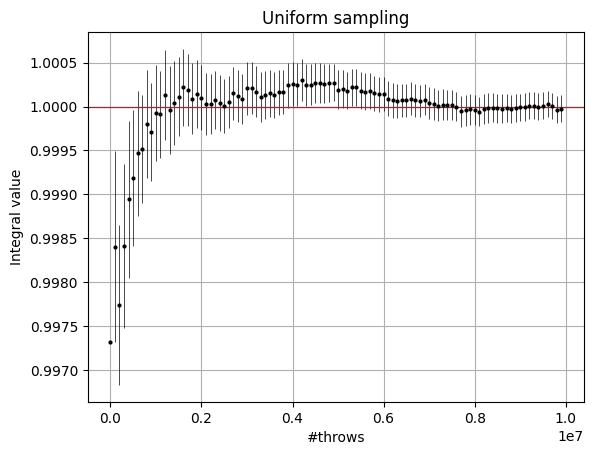

In [2]:
x, f, error = np.loadtxt("OUTPUT/integral_values_unif.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error, fmt='o', markersize=2, color= 'black', ecolor='black', linewidth=0.5)
plt.xlabel('#throws')
plt.ylabel('Integral value')
plt.axhline(y=1, color='red', linewidth=0.9)
plt.grid(True)
plt.title('Uniform sampling')
plt.show()

b) Ho scritto $f(x) = g(x)\cdot d(x) = \frac{f(x)}{d(x)}\cdot d(x)$, con $d(x)=2-2x$, avendo scelto $d(x)$ poichè approssima l'integranda sull'intervallo di integrazione.  Ho estratto $M=10^7$ punti dalla distribuzione $d(x)$ nell'intervallo di integrazione (tramite inversione della cumulativa) ed ho valutato l'integranda in $g(x)$. Anche in questo caso ho effettuato una stima dell'integrale e del relativo errore tramite media a blocchi ($N=100$ blocchi).

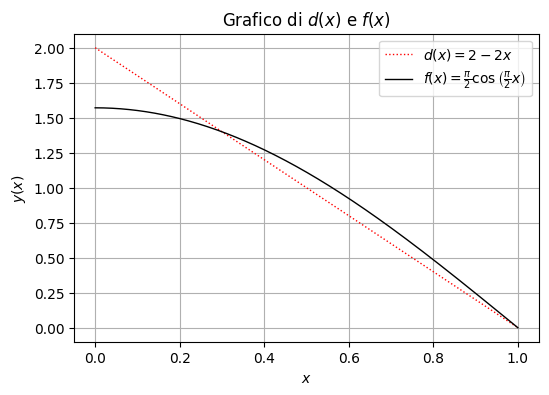

In [3]:
def d(x):
    return 2 - 2 * x

def f(x):
    return (np.pi / 2) * np.cos((np.pi / 2) * x)

x = np.linspace(0, 1, 400)

y_d = d(x)
y_f = f(x)

plt.figure(figsize=(6, 4))

plt.plot(x, y_d, label='$d(x) = 2 - 2x$', color='red', linestyle='dotted', lw=1)

plt.plot(x, y_f, label='$f(x) = \\frac{\\pi}{2} \\cos\\left(\\frac{\\pi}{2} x\\right)$', color='black', lw=1)

plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.title('Grafico di $d(x)$ e $f(x)$')
plt.legend()
plt.grid(True)

plt.show()


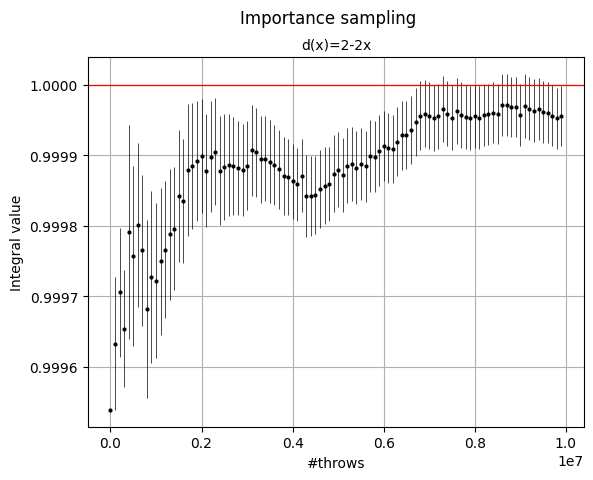

In [4]:
x, f, error = np.loadtxt("OUTPUT/integral_values_importance.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error, fmt='o', markersize=2, color= 'black', ecolor='black', linewidth=0.5)
plt.xlabel('#throws')
plt.ylabel('Integral value')
plt.axhline(y=1, color='red', linewidth=0.9)
plt.grid(True)
plt.suptitle('Importance sampling')
plt.title('d(x)=2-2x', fontsize=10)
plt.show()

Ho confrontato l'andamento dell'errore ottenuto nei due metodi all'aumentare del numero di punti $M$ utilizzati.

In entrambi i casi, l'errore segue un andamento del tipo $errore = \frac{\sigma_{I}}{\sqrt{M}}$, ma nel caso di sampling uniforme $\sigma_{I} \approx 0.5$, mentre nel caso di importance sampling $\sigma_{I} \approx 0.08$.

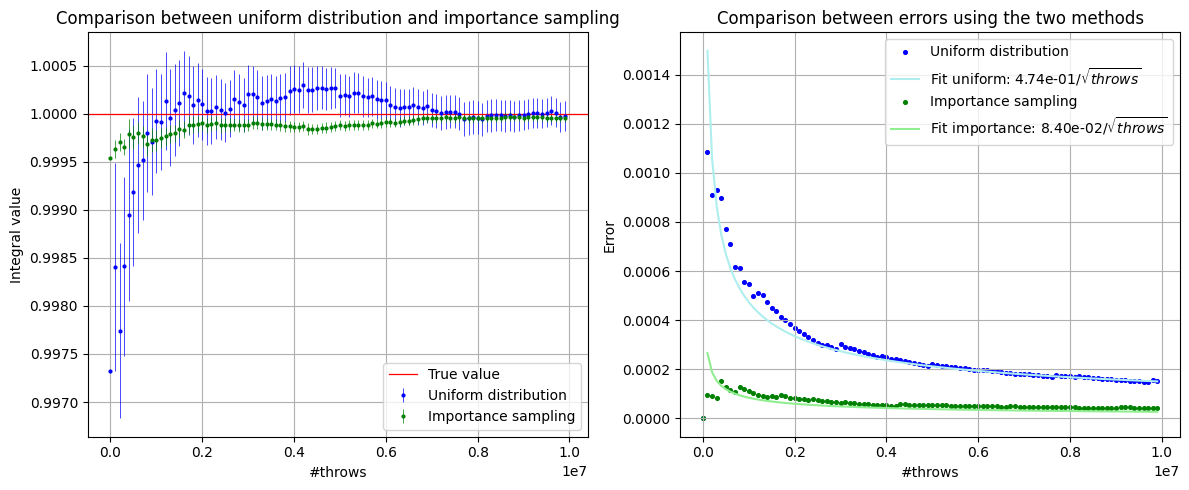

(array([0.47359519]), array([0.08399531]))

In [8]:
from scipy.optimize import curve_fit

# Load the data
x_unif, f_unif, error_unif = np.loadtxt("OUTPUT/integral_values_unif.dat", usecols=(0,1,2), delimiter=' ', unpack=True)
x_importance, f_importance, error_importance = np.loadtxt("OUTPUT/integral_values_importance.dat", usecols=(0,1,2), delimiter=' ', unpack=True)

# Plot both datasets on the same graph
plt.figure(figsize=(12, 5))

# First subplot: Integral values
plt.subplot(1, 2, 1)
plt.errorbar(x_unif, f_unif, yerr=error_unif, fmt='o', markersize=2, color='blue', ecolor='blue', linewidth=0.5, label='Uniform distribution')
plt.errorbar(x_importance, f_importance, yerr=error_importance, fmt='o', markersize=2, color='green', ecolor='green', linewidth=0.5, label='Importance sampling')
plt.axhline(y=1, color='red', linewidth=0.9, label='True value')
plt.xlabel('#throws')
plt.ylabel('Integral value')
plt.title('Comparison between uniform distribution and importance sampling')
plt.legend()
plt.grid(True)

# Define the fitting function
def fit_func(x, const):
    return const / np.sqrt(x)

# Perform the curve fit for both datasets
params_unif, _ = curve_fit(fit_func, x_unif[1:], error_unif[1:])
params_importance, _ = curve_fit(fit_func, x_importance[1:], error_importance[1:])

# Generate fitted data
fit_unif = fit_func(x_unif[1:], *params_unif)
fit_importance = fit_func(x_importance[1:], *params_importance)

# Second subplot: Errors and fits
plt.subplot(1, 2, 2)
plt.scatter(x_unif, error_unif, marker='o', color='blue', label='Uniform distribution', s=7)
plt.plot(x_unif[1:], fit_unif, color='paleturquoise', linestyle='-', label=f'Fit uniform: {params_unif[0]:.2e}/$\\sqrt{{throws}}$')
plt.scatter(x_importance, error_importance, marker='o', color='green', label='Importance sampling', s=7)
plt.plot(x_importance[1:], fit_importance, color='lightgreen', linestyle='-',label=f'Fit importance: {params_importance[0]:.2e}/$\\sqrt{{throws}}$')
plt.xlabel('#throws')
plt.ylabel('Error')
plt.title('Comparison between errors using the two methods')
plt.grid()
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

params_unif, params_importance


### Esercizio 02.2

L'esercizio richiede di simulare Random Walks in 3D e di mostrare l'andamento di $\sqrt{\langle |\vec{r}_i|^2 \rangle_{RW}}$, al variare del passo $i\in [0,10^2]$.
Per ciascun numero di passi $i$, ho effettuato $M=10^{4}$ simulazioni suddivise in $N_{bl}=100$ blocchi. Ho quindi plottato, per ciascun numero di passi $i$ fissato, il valore di $\sqrt{\langle |\vec{r}_i|^2 \rangle_{RW}}$ ed il relativo errore ottenuto al termine della simulazione (ossia il valore ottenuto come media dei valori di $\sqrt{\langle |\vec{r}_i|^2 \rangle_{RW}}$ ottenuti negli $N_{bl}$ blocchi ed il relativo errore ottenuto come deviazione standard di tale valor medio).

#### Random walk su reticolo cubico ($a=1$)
Ho generato ciascun passo estraendo un numero pseudo-casuale $y$ nell'intervallo [0,6). A seconda del sottointervallo in cui cadeva  $y$, ho incrementato o decrementato la posizione lungo l'asse \( x \), \( y \) o \( z \) come segue:

- Se \( 0 $\leq$ y < 1 \), ho incrementato \( x \) di un passo $a$.
- Se \( 1 $\leq$ y < 2 \), ho decrementato \( x \) di un passo $a$.
- Se \( 2 $\leq$ y < 3 \), ho incrementato \( y \) di un passo $a$.
- Se \( 3 $\leq$ y < 4 \), ho decrementato \( y \) di un passo $a$.
- Se \( 4 $\leq$ y < 5 \), ho incrementato \( z \) di un passo $a$.
- Se \( 5 $\leq$ y < 6 \), ho decrementato \( z \) di un passo $a$.

Aspettandomi un comportamento diffusivo, ho quindi eseguito un fit con la funzione $f(N)=k\sqrt{N}$, ottenendo come aspettato $k=a=1$. 

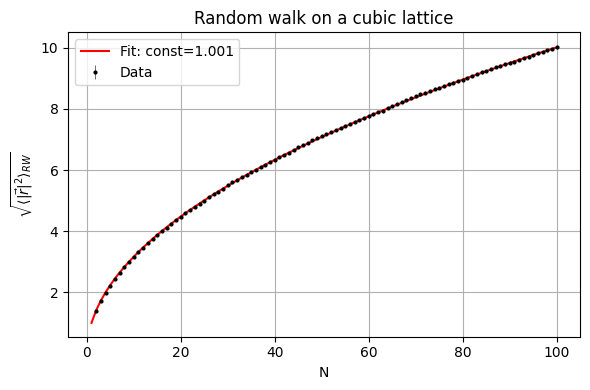

In [5]:
# Define the function to fit
def func(k, const):
    return np.sqrt(k) * const

# Load data from file
k2, rw2, error2 = np.loadtxt("OUTPUT/random_walk_lattice.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Fit the data to the function
popt, pcov = curve_fit(func, k2[1:], rw2[1:], sigma=error2[1:])
const_fit = popt[0]

# Create a figure and subplot for the second plot only
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the data with error bars
ax.errorbar(k2[1:], rw2[1:], yerr=error2[1:], fmt='o', markersize=2, color='black', ecolor='black', linewidth=0.4, label='Data')

# Generate points for the fitted curve
k_fit = np.linspace(min(k2), max(k2), 100)
ax.plot(k_fit, func(k_fit, const_fit), 'r-', label=f'Fit: const={const_fit:.3f}')

# Set labels and title
ax.set_xlabel('N')
ax.set_ylabel(r'$\sqrt{\langle |\vec{r}|^2 \rangle_{RW}}$')
ax.legend()
ax.grid(True)
ax.set_title('Random walk on a cubic lattice')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


#### Random Walk nel continuo ($a=1$)

Per campionare uniformemente l'angolo solido, ho generato ciascun passo estraendo due numeri pseudo-casuali $x_{1}$ ed $x_{2}$ nell'intervallo (-1,1) tali che $x_{1}^2 +x_{2}^2<1$ ed ho quindi incrementato le posizioni nelle tre direzioni \( x \), \( y \) e \( z \) come segue:

```cpp
position[0] += a * 2 * x1 * sqrt(1 - x1 * x1 - x2 * x2);
position[1] += a * 2 * x2 * sqrt(1 - x1 * x1 - x2 * x2);
position[2] += a * (1 - 2 * (x1 * x1 + x2 * x2));

Anche in questo caso, le misure mostrano un andamento diffusivo $f(N)=k\sqrt{N}$, con $k=a=1$. 

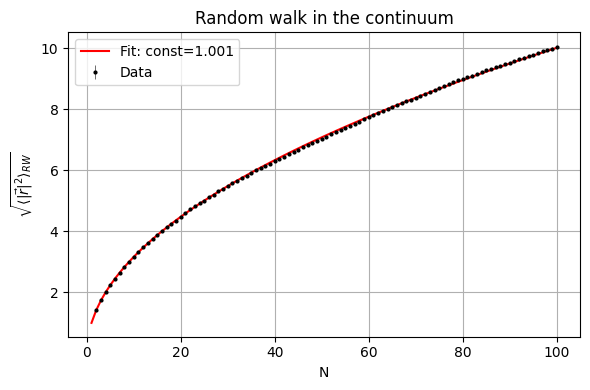

In [6]:
# Define the function to fit
def func(k, const):
    return np.sqrt(k) * const

# Load data from file
k2, rw2, error2 = np.loadtxt("OUTPUT/random_walk_continuum.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

# Fit the data to the function
popt, pcov = curve_fit(func, k2[1:], rw2[1:], sigma=error2[1:])
const_fit = popt[0]

# Create a figure and subplot for the second plot only
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the data with error bars
ax.errorbar(k2[1:], rw2[1:], yerr=error2[1:], fmt='o', markersize=2, color='black', ecolor='black', linewidth=0.4, label='Data')

# Generate points for the fitted curve
k_fit = np.linspace(min(k2), max(k2), 100)
ax.plot(k_fit, func(k_fit, const_fit), 'r-', label=f'Fit: const={const_fit:.3f}')

# Set labels and title
ax.set_xlabel('N')
ax.set_ylabel(r'$\sqrt{\langle |\vec{r}|^2 \rangle_{RW}}$')
ax.legend()
ax.grid(True)
ax.set_title('Random walk in the continuum')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()